In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

In [2]:
# creating the f(t) sequence
a, b, steps = (0, 14*np.pi, 10000)

# time, t
t = np.linspace(a, b, steps)

# f(t)
sequence = np.cos(t)

In [3]:
# setting training and validation percent
tr = 90

# training size
trainSize = int( len(sequence)*tr/100.0 )

# setting the window size
window = 100

In [4]:
# splitting the time series into train, validation and test sets
train = sequence[ : trainSize]  # train set
test = sequence[ trainSize - window : ]  # test set

In [5]:
# converting a sequence to a supervise learning data set
def create_dataset(dataset, look_back = 1) :
  dataX, dataY = [], []
  for i in range( len(dataset) - look_back ) :
    a = dataset[i : i + look_back]
    dataX.append(a)
    dataY.append(dataset[i + look_back])
  return np.array(dataX), np.array(dataY)

In [6]:
# adding Gaussian noise to the data
train_noisy = train + np.random.normal(0, 0.05, len(train))
test_noisy  = test  + np.random.normal(0, 0.05, len(test))

train_noisy, _ = create_dataset(train_noisy, window)
print ("Train:", train_noisy.shape)

test_noisy, _ = create_dataset(test_noisy, window)
print ("Test:", test_noisy.shape)

Train: (8900, 100)
Test: (1000, 100)


In [7]:
# defining a function that creates a vanilla autoencoder with a specified size for the latent space
def built_model(window, encoding_dim):
    # fixing the random numbers generator
    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()
    model.add(Input(shape = (window,)))
    model.add(Dense(encoding_dim))
    model.add(Dense(window))
    
    model.summary()

    # compiling the model
    model.compile(optimizer = "adam", loss = "mse")

    return model



Training with latent space size: 1




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │             101 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │             200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 0.2928
Epoch 2/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.0107
Epoch 3/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.0107
Epoch 4/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.0107
Epoch 5/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.0107
Epoch 6/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.0107
Epoch 7/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0107
Epoch 8/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 0.0107
Epoch 9/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.0107
Epoch 10/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.0107
Epoch 11/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.0107
Epoch 12/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.0107
Epoch 13/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.0106
Epoch 14/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0106
Epoch 15/20
557/557 ━━━━━━━━━

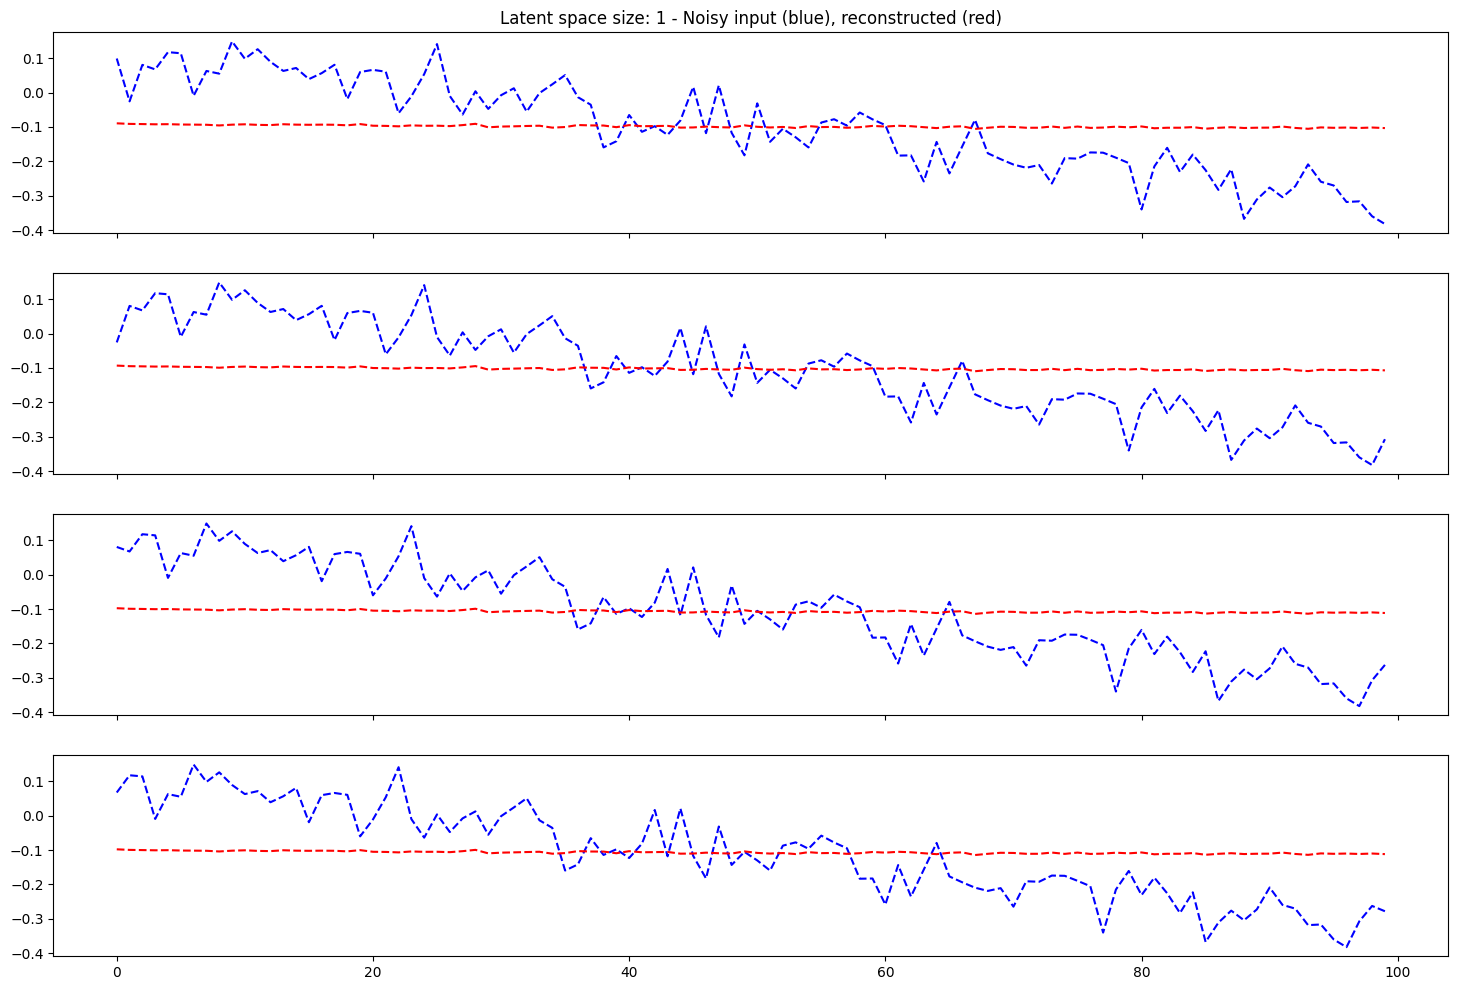



Training with latent space size: 4




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4)                   │             404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │             500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 904 (3.53 KB)

 Trainable params: 904 (3.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - loss: 0.1807
Epoch 2/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0092
Epoch 3/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.0041
Epoch 4/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.0028
Epoch 5/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0027
Epoch 6/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0027
Epoch 7/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0026
Epoch 8/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.0026
Epoch 9/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0026
Epoch 10/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0026
Epoch 11/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.0025
Epoch 12/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.0025
Epoch 13/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0025
Epoch 14/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0025
Epoch 15/20
557/557 ━━━━━━━━━

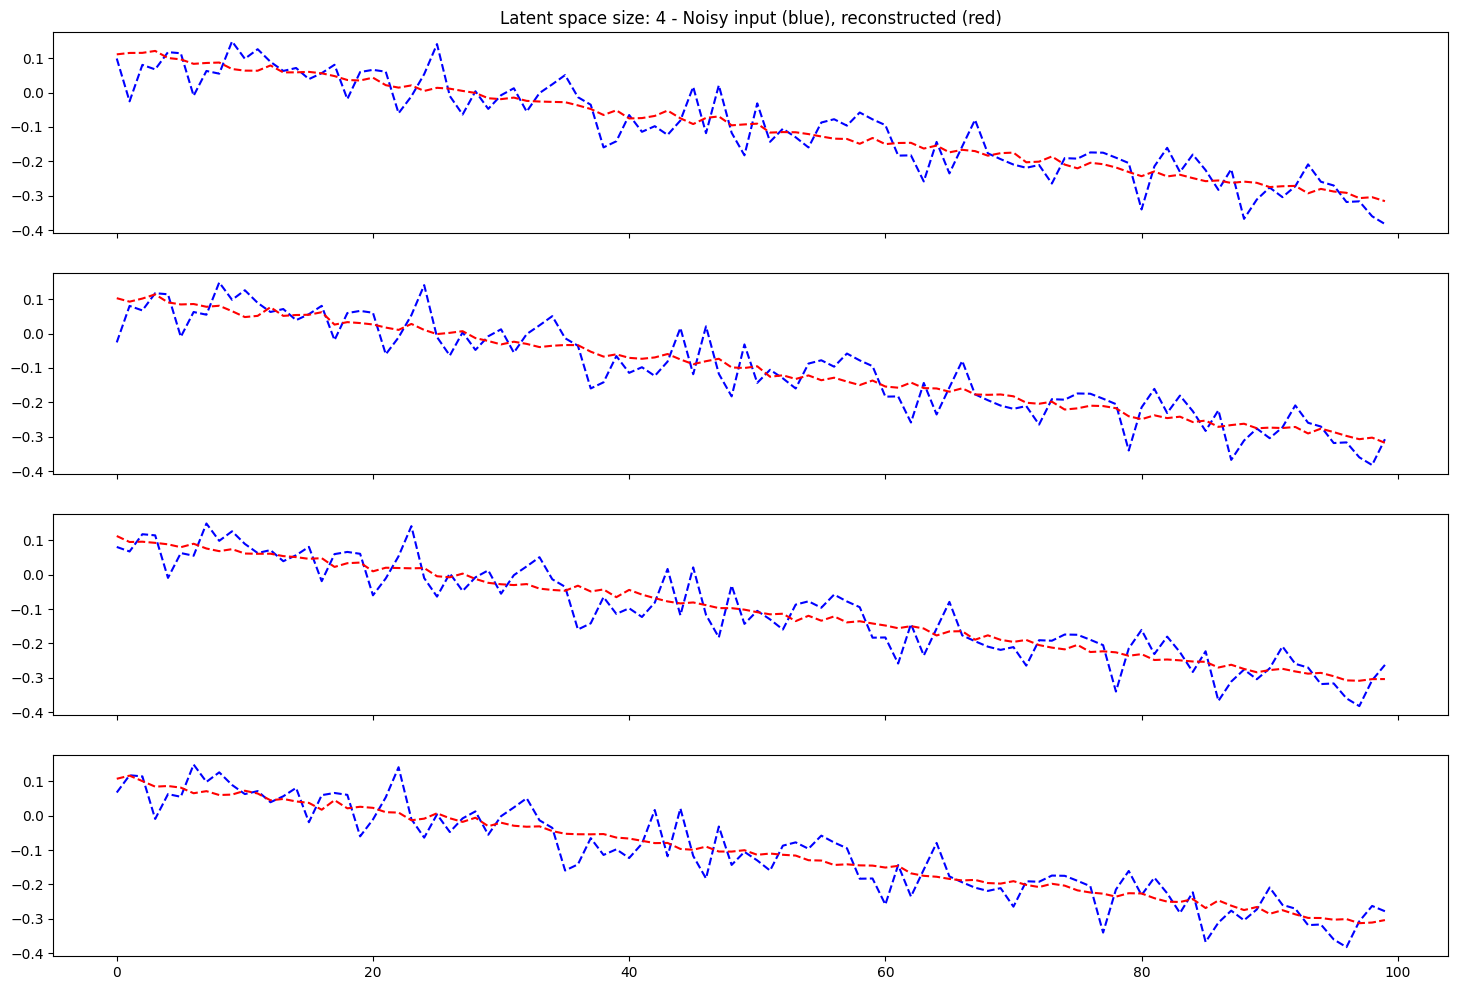



Training with latent space size: 20




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │           2,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │           2,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,120 (16.09 KB)

 Trainable params: 4,120 (16.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - loss: 0.1124
Epoch 2/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0037
Epoch 3/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.0034
Epoch 4/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.0031
Epoch 5/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.0029
Epoch 6/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0027
Epoch 7/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.0026
Epoch 8/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0025
Epoch 9/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.0024
Epoch 10/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.0023
Epoch 11/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.0022
Epoch 12/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.0022
Epoch 13/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0021
Epoch 14/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0021
Epoch 15/20
557/557 ━━━━━━━━━

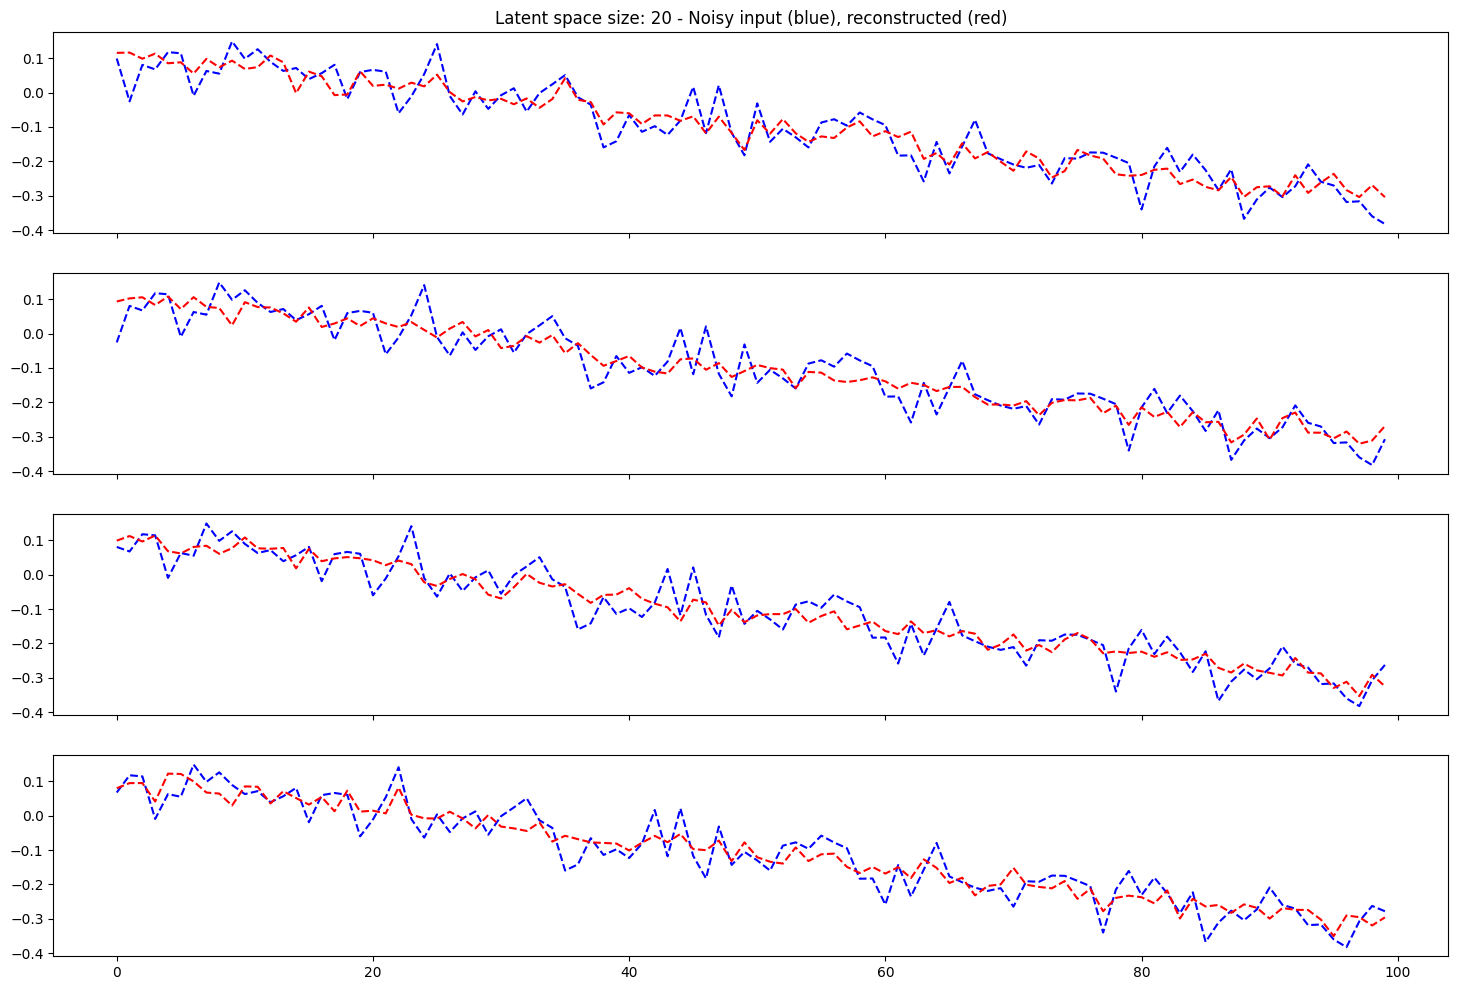

In [8]:
latent_space_sizes = [1, 4, 20]

models = {}
for latent_size in latent_space_sizes:

    print(f"\n\nTraining with latent space size: {latent_size}\n\n")
    # creating the model
    models[latent_size] = built_model(window, latent_size)
        
    history = models[latent_size].fit(train_noisy, train_noisy, epochs=20, batch_size = 16)

    reconstructed = models[latent_size].predict(test_noisy)

    # plotting a few samples
    fig, axs = plt.subplots(4, 1, figsize = (18, 12), sharex = True)

    for i, index in enumerate([1, 10, 20, 50]):  # arbitrary selected images
        if i == 0 :
            axs[i].set_title(f"Latent space size: {latent_size} - Noisy input (blue), reconstructed (red)")
        axs[i].plot(test_noisy[i], "b--")
        axs[i].plot(reconstructed[i], "r--")

    plt.show()

By quantitatively comparing the reconstructed (red) and noisy input (blue) lines on the plots above, we observe the following:

With only one node in the latent space, the model fails to capture the dynamics of the time series adequately. Consequently, the reconstruction is not satisfactory as it does not effectively remove the noise present in the data.

Increasing the number of nodes to four in the latent space allows the model to learn the basic characteristics of the time series. As a result, it successfully removes the noise from the data, resulting in a more accurate reconstruction.

However, as we further increase the number of nodes in the latent space, the model starts to capture more intricate details of the data. While this may seem beneficial, it also reproduces the noise present in the data. Consequently, the model is no longer suitable for denoising purposes, as it reproduces the noise instead of effectively removing it.

In conclusion, based on the provided noisy data, utilizing 4 nodes in the latent space yields better results for denoising.